In [110]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,multilabel_confusion_matrix,roc_auc_score,roc_curve,auc,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
import pandas as pd
# from sklearn.metrics._classification import _nanaverage
import seaborn as sns

def naive_bayes_search_non_binary(df1, df2,seed_value=22):
    X_train, X_test, Y_train, Y_test = train_test_split(df1, df2, test_size=0.3,random_state=seed_value)
    
    gnb = GaussianNB()
    gnb.fit(X_train, Y_train)
    
    predicted = gnb.predict(X_test)
    predicted_probs = gnb.predict_proba(X_test)
    
    # cross_val_scores = cross_val_score(gnb, X_train, Y_train, cv=5)  
    # print("Cross-Validation Scores:", cross_val_scores)
    # print("Mean CV Score:", cross_val_scores.mean())


    # train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, Y_train, cv=5)
    # train_scores_mean = np.mean(train_scores, axis=1)
    # test_scores_mean = np.mean(test_scores, axis=1)

    # plt.figure()
    # plt.title("Learning Curves")
    # plt.xlabel("Training examples")
    # plt.ylabel("Score")
    # plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    # plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    # plt.legend(loc="best")
    # plt.show()

    accuracy = accuracy_score(Y_test,predicted )
    f1 = f1_score(predicted, Y_test, average="weighted")
    conf_matrix = confusion_matrix(predicted, Y_test)
    precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
    recall = recall_score(Y_test, predicted, average="weighted")

    Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
    roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")

    conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
    tp = conf_matrices[:,1,1]
    fp = conf_matrices[:,0,1]
    tn = conf_matrices[:,0,0]
    fn = conf_matrices[:,1,0]
    # fpr = (fp/(tn + fp), tp + fn)
    tnr = (tn/(tn + fp), tp + fn)
    
    fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), predicted_probs.ravel())


    auc_val = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC (area = %0.2f)' % auc_val)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    out=ConfusionMatrixDisplay(conf_matrix,display_labels=gnb.classes_)
    out.plot()
    plt.show()
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall/Sensitivity/True Positive Rate:", recall)
    print("Specificity:", tnr)
    print("False Positive Rate:", fpr)
    print("Area under ROC curve:", roc)
    print("Confusion Matrix:\n", conf_matrix)

    return predicted





In [112]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,multilabel_confusion_matrix,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


# from sklearn.metrics._classification import _nanaverage

def naive_bayes_search(df1, df2,seed_value=22):
    X_train, X_test, Y_train, Y_test = train_test_split(df1, df2, test_size=0.3,random_state=seed_value)
    
    gnb = GaussianNB()
    gnb.fit(X_train, Y_train)
    
    predicted = gnb.predict(X_test)
    predicted_probs = gnb.predict_proba(X_test)
    
    # cross_val_scores = cross_val_score(gnb, X_train, Y_train, cv=5)  
    # print("Cross-Validation Scores:", cross_val_scores)
    # print("Mean CV Score:", cross_val_scores.mean())


    # train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, Y_train, cv=5)
    # train_scores_mean = np.mean(train_scores, axis=1)
    # test_scores_mean = np.mean(test_scores, axis=1)

    # plt.figure()
    # plt.title("Learning Curves")
    # plt.xlabel("Training examples")
    # plt.ylabel("Score")
    # plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    # plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    # plt.legend(loc="best")
    # plt.show()

    accuracy = accuracy_score(Y_test,predicted )
    f1 = f1_score(predicted, Y_test, average="weighted")
    conf_matrix = confusion_matrix(predicted, Y_test)
    precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
    recall = recall_score(Y_test, predicted, average="weighted")
    # roc = roc_auc_score(Y_test, predicted_probs, multi_class="ovr", average="weighted")
    conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
    tp = conf_matrices[:,1,1]
    fp = conf_matrices[:,0,1]
    tn = conf_matrices[:,0,0]
    fn = conf_matrices[:,1,0]
    # fpr = _nanaverage(fp/(tn + fp), tp + fn)
    # tnr = _nanaverage(tn/(tn + fp), tp + fn)

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall/Sensitivity/True Positive Rate:", recall)
    # print("Specificity:", tnr)
    # print("False Positive Rate:", fpr)
    # print("Area under ROC curve:", roc)
    print("Confusion Matrix:\n", conf_matrix)

    return predicted


In [80]:
import sklearn
print(sklearn.__version__)

1.2.2


In [70]:
import pandas as pd
merged_data = pd.read_csv('processed_df.csv')
# merged_data=pd.read_csv('Dataset/x_train_all.csv')
ytrainall = pd.read_csv('Dataset/y_train_all.csv')
merged_data = pd.concat([merged_data,ytrainall],axis = 1)
merged_data=merged_data.rename(columns={merged_data.columns[-1]:'label'})
merged_data=merged_data.rename(columns={merged_data.columns[0]:'labels'})
merged_data=merged_data.drop(columns =['labels'])
merged_data.columns.values[0] = '0'

In [3]:
merged_data.head()


,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,label
0,78,71,71,113,125,125,-114,-81,-104,-100,...,-121,83,104,124,-93,-74,-86,-107,-107,0
1,120,-114,-93,-100,-124,111,-122,-86,-36,-51,...,-114,120,90,53,80,-120,-58,-51,-51,0
2,85,106,120,113,118,-128,-100,-100,77,78,...,-114,124,102,78,73,104,-107,-72,-51,0
3,57,78,99,106,-116,-93,-96,116,29,113,...,120,109,99,100,87,88,113,-86,-58,0
4,99,99,92,85,106,123,-100,-93,77,57,...,113,-121,-95,-90,-110,-122,64,78,99,0


In [4]:
from sklearn.svm import SVC

x = merged_data.drop('label',axis=1)
y = merged_data['label']

svm = SVC(kernel='linear', decision_function_shape='ovr')

svm.fit(x, y)

SVC(kernel='linear')

In [5]:
feature_weights = svm.coef_


In [6]:
import numpy as np
k = 20
selected_features_per_class = {}
for class_label in range(10): 
    feature_ranking = np.argsort(np.abs(feature_weights[class_label]))
    selected_features = feature_ranking[:k]
    selected_features_per_class[class_label] = selected_features

print(selected_features_per_class)

{0: array([1599,   76,  595,  908,  916, 1859,  379, 1282,  839,  755,  211,
        994, 1332, 1844,  869,  551, 1046, 1984, 2254, 1841], dtype=int64), 1: array([1468,  484,  562,  743,  750, 2131,  375, 1228,   62,  190, 1885,
       1711, 2201,  647, 1866, 1783, 2249, 1369,   76,  656], dtype=int64), 2: array([ 619,  541, 1601,  495, 1760, 1119,  916,  721,  954, 1976, 1821,
       1456, 1689,  538,  615, 1695,  690, 2083,  989, 1024], dtype=int64), 3: array([1746, 1214, 2169,  548,  238,  589,  992,   66, 1799,  310, 1244,
       1327, 1664, 2112, 2216,  955,  351, 1691,  443,  193], dtype=int64), 4: array([ 391, 1677, 1922, 1820,  129,  204, 1421,  163,  739, 1683,  860,
        357, 1737, 1988, 1467,  746,  875,   85, 1170, 1116], dtype=int64), 5: array([1652,  773, 1815,  182,  225, 1301, 1190, 1086,  271, 1367, 1444,
       2047, 1632, 1831, 1028,  897,  134, 1688,  342,  489], dtype=int64), 6: array([ 607, 1650, 1643,  598, 1188, 1751,  290, 2091, 1160,  285, 1309,
       1250

In [7]:
xtrain = pd.read_csv('processed_df.csv')
# xtrain = pd.read_csv('Dataset/x_train_all.csv')
xtrain = xtrain.rename(columns={xtrain.columns[0]:'labels'})
xtrain = xtrain.drop(columns=['labels'])
ytrain0 = pd.read_csv('y_train_0.csv')
ytrain3 = pd.read_csv('y_train_3.csv')
ytrain1 = pd.read_csv('y_train_1.csv')
ytrain2 = pd.read_csv('y_train_2.csv')
ytrain4 = pd.read_csv('y_train_4.csv')
ytrain5 = pd.read_csv('y_train_5.csv')
ytrain6 = pd.read_csv('y_train_6.csv')
ytrain7 = pd.read_csv('y_train_7.csv')
ytrain8 = pd.read_csv('y_train_8.csv')
ytrain9 = pd.read_csv('y_train_9.csv')

In [8]:
xtrain.head()


,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78,71,71,113,125,125,-114,-81,-104,-100,...,-115,-121,83,104,124,-93,-74,-86,-107,-107
1,120,-114,-93,-100,-124,111,-122,-86,-36,-51,...,-118,-114,120,90,53,80,-120,-58,-51,-51
2,85,106,120,113,118,-128,-100,-100,77,78,...,-108,-114,124,102,78,73,104,-107,-72,-51
3,57,78,99,106,-116,-93,-96,116,29,113,...,-66,120,109,99,100,87,88,113,-86,-58
4,99,99,92,85,106,123,-100,-93,77,57,...,-128,113,-121,-95,-90,-110,-122,64,78,99


In [9]:
xy0_20 = None
for i in selected_features_per_class[0]:
    xy0_20 = pd.concat([xy0_20,xtrain.iloc[:,int(i)]],axis=1)
xy0_20 = pd.concat([xy0_20,ytrain0],axis=1)
xy0_20 = xy0_20.rename(columns={xy0_20.columns[-1]:'label'})
print(xy0_20)
    
xy1_20 = None
for i in selected_features_per_class[1]:
    xy1_20 = pd.concat([xy1_20,xtrain.iloc[:,int(i)]],axis=1)
xy1_20 = pd.concat([xy1_20,ytrain1],axis=1)
xy1_20 = xy1_20.rename(columns={xy1_20.columns[-1]:'label'})
print(xy1_20)

xy2_20 = None
for i in selected_features_per_class[2]:
    xy2_20 = pd.concat([xy2_20,xtrain.iloc[:,int(i)]],axis=1)
xy2_20 = pd.concat([xy2_20,ytrain2],axis=1)
xy2_20 = xy2_20.rename(columns={xy2_20.columns[-1]:'label'})
print(xy2_20)

xy3_20 = None
for i in selected_features_per_class[3]:
    xy3_20 = pd.concat([xy3_20,xtrain.iloc[:,int(i)]],axis=1)
xy3_20 = pd.concat([xy3_20,ytrain3],axis=1)
xy3_20 = xy3_20.rename(columns={xy3_20.columns[-1]:'label'})
print(xy3_20)

xy4_20 = None
for i in selected_features_per_class[4]:
    xy4_20 = pd.concat([xy4_20,xtrain.iloc[:,int(i)]],axis=1)
xy4_20 = pd.concat([xy4_20,ytrain4],axis=1)
xy4_20 = xy4_20.rename(columns={xy4_20.columns[-1]:'label'})
print(xy4_20)

xy5_20 = None
for i in selected_features_per_class[5]:
    xy5_20 = pd.concat([xy5_20,xtrain.iloc[:,int(i)]],axis=1)
xy5_20 = pd.concat([xy5_20,ytrain5],axis=1)
xy5_20 = xy5_20.rename(columns={xy5_20.columns[-1]:'label'})
print(xy5_20)

xy6_20 = None
for i in selected_features_per_class[6]:
    xy6_20 = pd.concat([xy6_20,xtrain.iloc[:,int(i)]],axis=1)
xy6_20 = pd.concat([xy6_20,ytrain6],axis=1)
xy6_20 = xy6_20.rename(columns={xy6_20.columns[-1]:'label'})
print(xy6_20)

xy7_20 = None
for i in selected_features_per_class[7]:
    xy7_20 = pd.concat([xy7_20,xtrain.iloc[:,int(i)]],axis=1)
xy7_20 = pd.concat([xy7_20,ytrain7],axis=1)
xy7_20 = xy7_20.rename(columns={xy7_20.columns[-1]:'label'})
print(xy7_20)

xy8_20 = None
for i in selected_features_per_class[8]:
    xy8_20 = pd.concat([xy8_20,xtrain.iloc[:,int(i)]],axis=1)
xy8_20 = pd.concat([xy8_20,ytrain8],axis=1)
xy8_20 = xy8_20.rename(columns={xy8_20.columns[-1]:'label'})
print(xy8_20)

xy9_20 = None
for i in selected_features_per_class[9]:
    xy9_20 = pd.concat([xy9_20,xtrain.iloc[:,int(i)]],axis=1)
xy9_20 = pd.concat([xy9_20,ytrain9],axis=1)
xy9_20 = xy9_20.rename(columns={xy9_20.columns[-1]:'label'})
print(xy9_20)

    


      1599  76  595  908  916  1859  379  1282  839  755  ...  994  1332  \
0       71  -8  -76  114   80   104 -113  -113  -10  -81  ...   84    96   
1      106 -91  -51  124  108  -118  -47    -7   -7  -60  ... -100    88   
2       78 -57  114  126   89  -122  -67   -12   -1  -74  ... -126    60   
3       92 -37   56 -125  121   -77 -109  -100  -20  -86  ... -100    46   
4       78 -53  -88 -111  -23   -48 -110   -38  -23  -81  ...  -98  -100   
...    ...  ..  ...  ...  ...   ...  ...   ...  ...  ...  ...  ...   ...   
9685    85  74 -125 -104  -24  -108  -64   111  -32  111  ...   87  -100   
9686    85  -1   90  -99   -1   -92   66    74  -42  -81  ...   98   -96   
9687   120  -1   84  -94  -20   127  -48    58  -42   59  ...  102   -76   
9688    92 -17   77  101   -1   118   45    44  -42   62  ...  -71   -90   
9689    78  84   70   52  -99   127  106    57  -57   57  ...   40   120   

      1844  869  551  1046  1984  2254  1841  label  
0      114  -88 -108   -90   -52 

In [10]:
xy0_10 = None
y=0
for i in selected_features_per_class[0]:
    if y >= 10:
        break
    xy0_10 = pd.concat([xy0_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy0_10 = pd.concat([xy0_10,ytrain0],axis=1)
xy0_10 = xy0_10.rename(columns={xy0_10.columns[-1]:'label'})
print(xy0_10)
    
xy1_10 = None
y=0
for i in selected_features_per_class[1]:
    if y >= 10:
        break
    xy1_10 = pd.concat([xy1_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy1_10 = pd.concat([xy1_10,ytrain1],axis=1)
xy1_10 = xy1_10.rename(columns={xy1_10.columns[-1]:'label'})
print(xy1_10)

xy2_10 = None
y=0
for i in selected_features_per_class[2]:
    if y >= 10:
        break
    xy2_10 = pd.concat([xy2_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy2_10 = pd.concat([xy2_10,ytrain2],axis=1)
xy2_10 = xy2_10.rename(columns={xy2_10.columns[-1]:'label'})
print(xy2_10)

xy3_10 = None
y=0
for i in selected_features_per_class[3]:
    if y >= 10:
        break
    xy3_10 = pd.concat([xy3_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy3_10 = pd.concat([xy3_10,ytrain3],axis=1)
xy3_10 = xy3_10.rename(columns={xy3_10.columns[-1]:'label'})
print(xy3_10)

xy4_10 = None
y=0
for i in selected_features_per_class[4]:
    if y >= 10:
        break
    xy4_10 = pd.concat([xy4_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy4_10 = pd.concat([xy4_10,ytrain4],axis=1)
xy4_10 = xy4_10.rename(columns={xy4_10.columns[-1]:'label'})
print(xy4_10)

xy5_10 = None
y=0
for i in selected_features_per_class[5]:
    if y >= 10:
        break
    xy5_10 = pd.concat([xy5_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy5_10 = pd.concat([xy5_10,ytrain5],axis=1)
xy5_10 = xy5_10.rename(columns={xy5_10.columns[-1]:'label'})
print(xy5_10)

xy6_10 = None
y=0
for i in selected_features_per_class[6]:
    if y >= 10:
        break
    xy6_10 = pd.concat([xy6_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy6_10 = pd.concat([xy6_10,ytrain6],axis=1)
xy6_10 = xy6_10.rename(columns={xy6_10.columns[-1]:'label'})
print(xy6_10)

xy7_10 = None
y=0
for i in selected_features_per_class[7]:
    if y >= 10:
        break
    xy7_10 = pd.concat([xy7_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy7_10 = pd.concat([xy7_10,ytrain7],axis=1)
xy7_10 = xy7_10.rename(columns={xy7_10.columns[-1]:'label'})
print(xy7_10)

xy8_10 = None
y=0
for i in selected_features_per_class[8]:
    if y >= 10:
        break
    xy8_10 = pd.concat([xy8_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy8_10 = pd.concat([xy8_10,ytrain8],axis=1)
xy8_10 = xy8_10.rename(columns={xy8_10.columns[-1]:'label'})
print(xy8_10)

xy9_10 = None
y=0
for i in selected_features_per_class[9]:
    if y >= 10:
        break
    xy9_10 = pd.concat([xy9_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy9_10 = pd.concat([xy9_10,ytrain9],axis=1)
xy9_10 = xy9_10.rename(columns={xy9_10.columns[-1]:'label'})
print(xy9_10)


      1599  76  595  908  916  1859  379  1282  839  755  label
0       71  -8  -76  114   80   104 -113  -113  -10  -81      0
1      106 -91  -51  124  108  -118  -47    -7   -7  -60      0
2       78 -57  114  126   89  -122  -67   -12   -1  -74      0
3       92 -37   56 -125  121   -77 -109  -100  -20  -86      0
4       78 -53  -88 -111  -23   -48 -110   -38  -23  -81      0
...    ...  ..  ...  ...  ...   ...  ...   ...  ...  ...    ...
9685    85  74 -125 -104  -24  -108  -64   111  -32  111      1
9686    85  -1   90  -99   -1   -92   66    74  -42  -81      1
9687   120  -1   84  -94  -20   127  -48    58  -42   59      1
9688    92 -17   77  101   -1   118   45    44  -42   62      1
9689    78  84   70   52  -99   127  106    57  -57   57      1

[9690 rows x 11 columns]
      1468  484  562  743  750  2131  375  1228  62  190  label
0     -109  -78  123  115   71   104   66    -9 -24 -114      1
1     -112  -91 -110  -79   82  -108   87   121 -37   92      1
2      -98  -7

In [11]:
xy0_5 = None
y=0
for i in selected_features_per_class[0]:
    if y >= 5:
        break
    xy0_5 = pd.concat([xy0_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy0_5 = pd.concat([xy0_5,ytrain0],axis=1)
xy0_5 = xy0_5.rename(columns={xy0_5.columns[-1]:'label'})
print(xy0_5)
    
xy1_5 = None
y=0
for i in selected_features_per_class[1]:
    if y >= 5:
        break
    xy1_5 = pd.concat([xy1_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy1_5 = pd.concat([xy1_5,ytrain1],axis=1)
xy1_5 = xy1_5.rename(columns={xy1_5.columns[-1]:'label'})
print(xy1_5)

xy2_5 = None
y=0
for i in selected_features_per_class[2]:
    if y >= 5:
        break
    xy2_5 = pd.concat([xy2_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy2_5 = pd.concat([xy2_5,ytrain2],axis=1)
xy2_5 = xy2_5.rename(columns={xy2_5.columns[-1]:'label'})
print(xy2_5)

xy3_5 = None
y=0
for i in selected_features_per_class[3]:
    if y >= 5:
        break
    xy3_5 = pd.concat([xy3_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy3_5 = pd.concat([xy3_5,ytrain3],axis=1)
xy3_5 = xy3_5.rename(columns={xy3_5.columns[-1]:'label'})
print(xy3_5)

xy4_5 = None
y=0
for i in selected_features_per_class[4]:
    if y >= 5:
        break
    xy4_5 = pd.concat([xy4_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy4_5 = pd.concat([xy4_5,ytrain4],axis=1)
xy4_5 = xy4_5.rename(columns={xy4_5.columns[-1]:'label'})
print(xy4_5)

xy5_5 = None
y=0
for i in selected_features_per_class[5]:
    if y >= 5:
        break
    xy5_5 = pd.concat([xy5_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy5_5 = pd.concat([xy5_5,ytrain5],axis=1)
xy5_5 = xy5_5.rename(columns={xy5_5.columns[-1]:'label'})
print(xy5_5)

xy6_5 = None
y=0
for i in selected_features_per_class[6]:
    if y >= 5:
        break
    xy6_5 = pd.concat([xy6_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy6_5 = pd.concat([xy6_5,ytrain6],axis=1)
xy6_5 = xy6_5.rename(columns={xy6_5.columns[-1]:'label'})
print(xy6_5)

xy7_5 = None
y=0
for i in selected_features_per_class[7]:
    if y >= 5:
        break
    xy7_5 = pd.concat([xy7_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy7_5 = pd.concat([xy7_5,ytrain7],axis=1)
xy7_5 = xy7_5.rename(columns={xy7_5.columns[-1]:'label'})
print(xy7_5)

xy8_5 = None
y=0
for i in selected_features_per_class[8]:
    if y >= 5:
        break
    xy8_5 = pd.concat([xy8_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy8_5 = pd.concat([xy8_5,ytrain8],axis=1)
xy8_5 = xy8_5.rename(columns={xy8_5.columns[-1]:'label'})
print(xy8_5)

xy9_5 = None
y=0
for i in selected_features_per_class[9]:
    if y >= 5:
        break
    xy9_5 = pd.concat([xy9_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy9_5 = pd.concat([xy9_5,ytrain9],axis=1)
xy9_5 = xy9_5.rename(columns={xy9_5.columns[-1]:'label'})
print(xy9_5)


      1599  76  595  908  916  label
0       71  -8  -76  114   80      0
1      106 -91  -51  124  108      0
2       78 -57  114  126   89      0
3       92 -37   56 -125  121      0
4       78 -53  -88 -111  -23      0
...    ...  ..  ...  ...  ...    ...
9685    85  74 -125 -104  -24      1
9686    85  -1   90  -99   -1      1
9687   120  -1   84  -94  -20      1
9688    92 -17   77  101   -1      1
9689    78  84   70   52  -99      1

[9690 rows x 6 columns]
      1468  484  562  743  750  label
0     -109  -78  123  115   71      1
1     -112  -91 -110  -79   82      1
2      -98  -79 -128  -44  117      1
3      -13  -64  120  -15  -90      1
4       35   87  -91   90   57      1
...    ...  ...  ...  ...  ...    ...
9685    39   -1  -86  -41  114      1
9686    28   -1   -1  -51 -108      1
9687    46   -1 -122  -46  -15      1
9688    46   -1   53  -46  -40      1
9689    37  -80   67  -44 -128      1

[9690 rows x 6 columns]
      619  541  1601  495  1760  label
0      80 -

In [12]:
y_train=xy0_5['label']
y_train

0       0
1       0
2       0
3       0
4       0
       ..
9685    1
9686    1
9687    1
9688    1
9689    1
Name: label, Length: 9690, dtype: int64

In [13]:
xy0_5

,1599,76,595,908,916,label
0,71,-8,-76,114,80,0
1,106,-91,-51,124,108,0
2,78,-57,114,126,89,0
3,92,-37,56,-125,121,0
4,78,-53,-88,-111,-23,0
...,...,...,...,...,...,...
9685,85,74,-125,-104,-24,1
9686,85,-1,90,-99,-1,1
9687,120,-1,84,-94,-20,1
9688,92,-17,77,101,-1,1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

seed_value = 22
processed_df = xy9_20.drop(columns=['label'])
y_train = xy9_20['label']

X_train, X_test, Y_train, Y_test = train_test_split(processed_df, y_train, test_size=0.3, random_state=seed_value)

gnb = GaussianNB()

gnb.fit(X_train, Y_train)

predicted = gnb.predict(X_test)

In [15]:
accuracy = accuracy_score(predicted, Y_test)
f1 = f1_score(predicted, Y_test, average="weighted")
conf_matrix = confusion_matrix(predicted, Y_test)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.95734434124527
F1 Score: 0.9581863979121424
Confusion Matrix:
 [[  12   59]
 [  65 2771]]


In [113]:
y_train=xy0_5['label']
processed_df=xy0_5.drop(columns=['label'])
naive_bayes_search(processed_df,y_train)

Accuracy: 0.977640178878569
F1 Score: 0.9886936858584103
Precision: 0.9781401404791514
Recall/Sensitivity/True Positive Rate: 0.977640178878569
Confusion Matrix:
 [[   0    0]
 [  65 2842]]


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [114]:
for i in range(10):
    strings=globals()["xy{}_5".format(i)]
    print("The current Data frame is: ",i)
    y_train=strings['label']
    processed_df=strings.drop(columns=['label'])
    naive_bayes_search(processed_df,y_train)
    print("\n")

The current Data frame is:  0
Accuracy: 0.977640178878569
F1 Score: 0.9886936858584103
Precision: 0.9781401404791514
Recall/Sensitivity/True Positive Rate: 0.977640178878569
Confusion Matrix:
 [[   0    0]
 [  65 2842]]


The current Data frame is:  1
Accuracy: 0.7640178878568972
F1 Score: 0.8662246489859594
Precision: 0.8197054451084171
Recall/Sensitivity/True Positive Rate: 0.7640178878568972
Confusion Matrix:
 [[   0    0]
 [ 686 2221]]


The current Data frame is:  2
Accuracy: 0.7715858273133815
F1 Score: 0.8710679611650485
Precision: 0.8237588615974939
Recall/Sensitivity/True Positive Rate: 0.7715858273133815
Confusion Matrix:
 [[   0    0]
 [ 664 2243]]


The current Data frame is:  3
Accuracy: 0.8555211558307534
F1 Score: 0.9221357063403782
Precision: 0.8763952922432349
Recall/Sensitivity/True Positive Rate: 0.8555211558307534
Confusion Matrix:
 [[   0    0]
 [ 420 2487]]


The current Data frame is:  4
Accuracy: 0.7994496044031648
F1 Score: 0.8885490346014147
Precision: 0.83967

In [115]:
for i in range(10):
    strings=globals()["xy{}_10".format(i)]
    print("The current Data frame is: ",i)
    y_train=strings['label']
    processed_df=strings.drop(columns=['label'])
    naive_bayes_search(processed_df,y_train)
    print("\n")

The current Data frame is:  0
Accuracy: 0.977640178878569
F1 Score: 0.9886936858584103
Precision: 0.9781401404791514
Recall/Sensitivity/True Positive Rate: 0.977640178878569
Confusion Matrix:
 [[   0    0]
 [  65 2842]]


The current Data frame is:  1
Accuracy: 0.7619539043687651
F1 Score: 0.8599517440367839
Precision: 0.6577912907654885
Recall/Sensitivity/True Positive Rate: 0.7619539043687651
Confusion Matrix:
 [[   5   11]
 [ 681 2210]]


The current Data frame is:  2
Accuracy: 0.7715858273133815
F1 Score: 0.8710679611650485
Precision: 0.8237588615974939
Recall/Sensitivity/True Positive Rate: 0.7715858273133815
Confusion Matrix:
 [[   0    0]
 [ 664 2243]]


The current Data frame is:  3
Accuracy: 0.8555211558307534
F1 Score: 0.9221357063403782
Precision: 0.8763952922432349
Recall/Sensitivity/True Positive Rate: 0.8555211558307534
Confusion Matrix:
 [[   0    0]
 [ 420 2487]]


The current Data frame is:  4
Accuracy: 0.7997936016511867
F1 Score: 0.8871228673554946
Precision: 0.76000

In [116]:
for i in range(10):
    strings=globals()["xy{}_20".format(i)]
    print("The current Data frame is: ",i)
    y_train=strings['label']
    processed_df=strings.drop(columns=['label'])
    naive_bayes_search(processed_df,y_train)
    print("\n")

The current Data frame is:  0
Accuracy: 0.977640178878569
F1 Score: 0.9886936858584103
Precision: 0.9781401404791514
Recall/Sensitivity/True Positive Rate: 0.977640178878569
Confusion Matrix:
 [[   0    0]
 [  65 2842]]


The current Data frame is:  1
Accuracy: 0.7389060887512899
F1 Score: 0.7640212232922994
Precision: 0.7027997924669046
Recall/Sensitivity/True Positive Rate: 0.7389060887512899
Confusion Matrix:
 [[ 169  242]
 [ 517 1979]]


The current Data frame is:  2
Accuracy: 0.7715858273133815
F1 Score: 0.8710679611650485
Precision: 0.8237588615974939
Recall/Sensitivity/True Positive Rate: 0.7715858273133815
Confusion Matrix:
 [[   0    0]
 [ 664 2243]]


The current Data frame is:  3
Accuracy: 0.8531131750945993
F1 Score: 0.893655098457527
Precision: 0.8090299397771646
Recall/Sensitivity/True Positive Rate: 0.8531131750945993
Confusion Matrix:
 [[  47   54]
 [ 373 2433]]


The current Data frame is:  4
Accuracy: 0.8211214310285517
F1 Score: 0.8481711220118504
Precision: 0.796870

#### Victor 

In [72]:
features = []
for i in range(len(selected_features_per_class)):
    features.append(selected_features_per_class[i][0:20])
features = np.concatenate(features)
features = np.unique(features)
features = features.tolist()
for i in range(len(features)):
    features[i] = str(features[i])
features



['52',
 '55',
 '62',
 '66',
 '76',
 '85',
 '87',
 '109',
 '117',
 '129',
 '134',
 '163',
 '179',
 '180',
 '181',
 '182',
 '190',
 '193',
 '204',
 '211',
 '225',
 '227',
 '238',
 '240',
 '252',
 '271',
 '277',
 '285',
 '290',
 '310',
 '342',
 '351',
 '356',
 '357',
 '375',
 '379',
 '391',
 '443',
 '482',
 '484',
 '485',
 '489',
 '495',
 '505',
 '538',
 '541',
 '548',
 '551',
 '562',
 '588',
 '589',
 '595',
 '598',
 '607',
 '615',
 '619',
 '647',
 '655',
 '656',
 '674',
 '676',
 '683',
 '690',
 '699',
 '719',
 '721',
 '739',
 '743',
 '746',
 '750',
 '755',
 '765',
 '773',
 '778',
 '814',
 '839',
 '860',
 '869',
 '875',
 '897',
 '908',
 '916',
 '931',
 '954',
 '955',
 '962',
 '989',
 '992',
 '994',
 '1006',
 '1016',
 '1017',
 '1024',
 '1028',
 '1046',
 '1086',
 '1091',
 '1116',
 '1119',
 '1136',
 '1141',
 '1158',
 '1160',
 '1170',
 '1188',
 '1190',
 '1213',
 '1214',
 '1228',
 '1233',
 '1244',
 '1250',
 '1258',
 '1265',
 '1282',
 '1298',
 '1301',
 '1309',
 '1312',
 '1318',
 '1323',
 '1327'

In [73]:
x_train = pd.read_csv('Dataset/x_train_all.csv')
y_train = pd.read_csv('Dataset/y_train_all.csv')
x_train

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,247.0,220.0,254.0,213.0,129.0,208.0,254.0,255.0,255.0,255.0,...,35.0,29.0,27.0,26.0,25.0,23.0,22.0,26.0,26.0,27.0
9686,151.0,118.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,252.0,...,37.0,31.0,30.0,30.0,30.0,30.0,29.0,26.0,28.0,27.0
9687,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,41.0,49.0,42.0,36.0,33.0,36.0,39.0,31.0,39.0,43.0
9688,255.0,253.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,38.0,27.0,26.0,27.0,35.0,28.0,27.0,26.0,26.0,24.0


In [74]:
reduced_x_train = xtrain[features]
reduced_x_train

,52,55,62,66,76,85,87,109,117,129,...,2157,2169,2194,2201,2216,2249,2254,2255,2270,2301
0,-125,-67,-24,-40,-8,104,-72,-39,64,-121,...,-65,85,100,-128,62,116,-65,-93,65,-86
1,-111,-81,-37,-1,-91,64,92,-34,50,-58,...,-114,113,-15,76,74,83,-51,-44,86,-58
2,-120,-112,-1,-54,-57,66,-107,-1,-93,-36,...,119,120,-46,85,87,95,-79,-58,68,-107
3,-102,104,-1,-100,-37,-103,-128,-1,-58,-51,...,118,-121,124,109,73,104,-93,-65,51,113
4,-127,-105,-19,-44,-53,57,113,-10,78,-44,...,88,99,-96,127,110,-117,85,120,-77,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,-1,-1,-1,106,74,30,28,-1,-8,92,...,91,78,-40,63,80,63,99,106,-17,99
9686,-1,-65,-1,-1,-1,-1,-79,-58,-36,99,...,78,92,-94,97,62,97,92,64,-36,71
9687,-1,-1,-1,-1,-1,-126,-79,-1,-1,-1,...,70,92,-42,69,76,83,-121,-79,-27,92
9688,-1,-1,-1,-1,-17,-1,-29,-1,-1,-1,...,77,-114,-35,73,64,66,85,92,-34,92


c:\Users\anshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


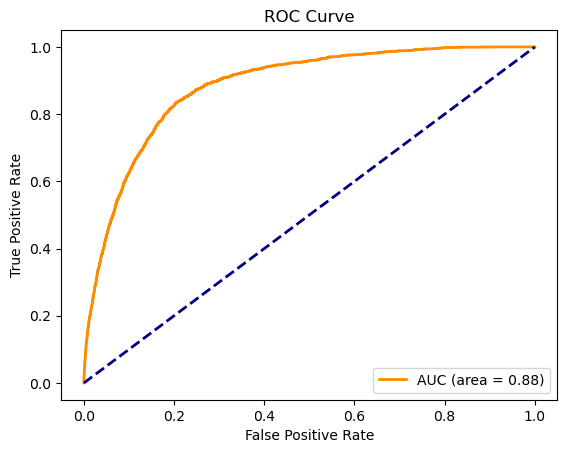

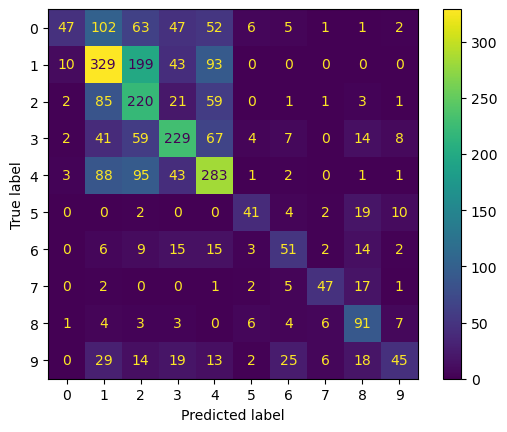

Accuracy: 0.4757481940144479
F1 Score: 0.46517680193532784
Precision: 0.5257300207272383
Recall/Sensitivity/True Positive Rate: 0.4757481940144479
Specificity: (array([0.9018297 , 0.84466457, 0.92287115, 0.91877764, 0.89931153,
       0.986981  , 0.9764538 , 0.99014778, 0.98754122, 0.95547703]), array([ 65, 686, 664, 420, 583,  65, 104,  65, 178,  77], dtype=int64))
False Positive Rate: [0.         0.         0.         ... 0.90524787 0.90524787 1.        ]
Area under ROC curve: 0.8252797345785611
Confusion Matrix:
 [[ 47 102  63  47  52   6   5   1   1   2]
 [ 10 329 199  43  93   0   0   0   0   0]
 [  2  85 220  21  59   0   1   1   3   1]
 [  2  41  59 229  67   4   7   0  14   8]
 [  3  88  95  43 283   1   2   0   1   1]
 [  0   0   2   0   0  41   4   2  19  10]
 [  0   6   9  15  15   3  51   2  14   2]
 [  0   2   0   0   1   2   5  47  17   1]
 [  1   4   3   3   0   6   4   6  91   7]
 [  0  29  14  19  13   2  25   6  18  45]]


array([1, 4, 4, ..., 9, 6, 1], dtype=int64)

In [111]:
naive_bayes_search_non_binary(reduced_x_train, y_train)

#### BernoulliNB()

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(reduced_x_train), columns=reduced_x_train.columns)


In [38]:
from sklearn.naive_bayes import CategoricalNB
 
def naive_bayes_search(df1, df2,seed_value=22):
    X_train, X_test, Y_train, Y_test = train_test_split(df1, df2, test_size=0.3,random_state=seed_value)
    
    gnb = CategoricalNB()
    gnb.fit(X_train, Y_train)
    
    predicted = gnb.predict(X_test)
    predicted_probs = gnb.predict_proba(X_test)
    
    # cross_val_scores = cross_val_score(gnb, X_train, Y_train, cv=5)  
    # print("Cross-Validation Scores:", cross_val_scores)
    # print("Mean CV Score:", cross_val_scores.mean())


    # train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, Y_train, cv=5)
    # train_scores_mean = np.mean(train_scores, axis=1)
    # test_scores_mean = np.mean(test_scores, axis=1)

    # plt.figure()
    # plt.title("Learning Curves")
    # plt.xlabel("Training examples")
    # plt.ylabel("Score")
    # plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    # plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    # plt.legend(loc="best")
    # plt.show()

    accuracy = accuracy_score(Y_test,predicted )
    f1 = f1_score(predicted, Y_test, average="weighted")
    conf_matrix = confusion_matrix(predicted, Y_test)
    precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
    recall = recall_score(Y_test, predicted, average="weighted")
    # roc = roc_auc_score(Y_test, predicted_probs, multi_class="ovr", average="weighted")
    conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
    tp = conf_matrices[:,1,1]
    fp = conf_matrices[:,0,1]
    tn = conf_matrices[:,0,0]
    fn = conf_matrices[:,1,0]
    # fpr = _nanaverage(fp/(tn + fp), tp + fn)
    # tnr = _nanaverage(tn/(tn + fp), tp + fn)

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall/Sensitivity/True Positive Rate:", recall)
    # print("Specificity:", tnr)
    # print("False Positive Rate:", fpr)
    # print("Area under ROC curve:", roc)
    print("Confusion Matrix:\n", conf_matrix)

    return predicted

In [63]:
naive_bayes_search(df_normalized, y_train)

c:\Users\anshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: multiclass format is not supported

In [88]:
# original_image = reduced_x_train.iloc[0].values.reshape(14, 14)
# plt.imshow(original_image, cmap='gray')

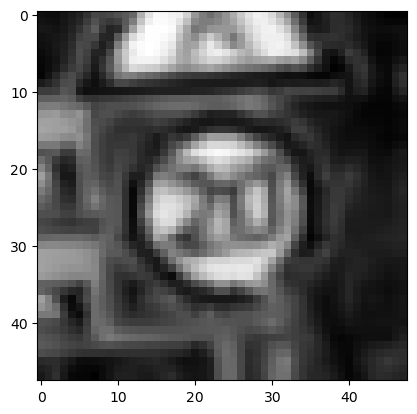

In [25]:
original_image = xtrain.iloc[0].values.reshape(48, 48)
plt.imshow(original_image, cmap='gray')

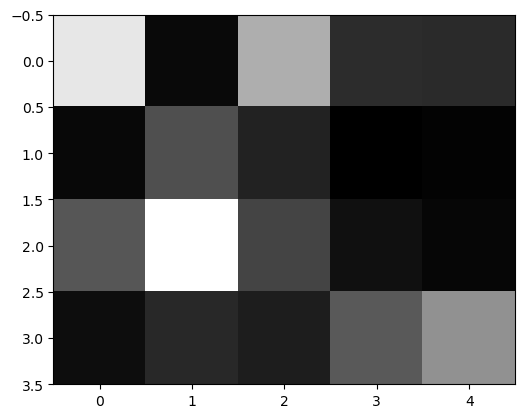

In [26]:
new = xy0_20.drop(columns=["label"])

original_image = new.iloc[0].values.reshape(4, 5)
plt.imshow(original_image, cmap='gray')

In [55]:
from sklearn.multiclass import OneVsRestClassifier
classifiers = [GaussianNB() for i in range(10)]
ovr = OneVsRestClassifier(GaussianNB())

X_train, X_test, Y_train, Y_test = train_test_split(reduced_x_train, ytrainall, test_size=0.3,random_state=seed_value)

ovr.fit(X_train, Y_train)
predicted = ovr.predict(X_test)
predicted_probs = ovr.predict_proba(X_test)

# cross_val_scores = cross_val_score(gnb, X_train, Y_train, cv=5)  
# print("Cross-Validation Scores:", cross_val_scores)
# print("Mean CV Score:", cross_val_scores.mean())


# train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, Y_train, cv=5)
# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.figure()
# plt.title("Learning Curves")
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# plt.legend(loc="best")
# plt.show()

accuracy = accuracy_score(Y_test,predicted )
f1 = f1_score(predicted, Y_test, average="weighted")
conf_matrix = confusion_matrix(predicted, Y_test)
precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
recall = recall_score(Y_test, predicted, average="weighted")
# roc = roc_auc_score(Y_test, predicted_probs, multi_class="ovr", average="weighted")
# conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
# tp = conf_matrices[:,1,1]
# fp = conf_matrices[:,0,1]
# tn = conf_matrices[:,0,0]
# fn = conf_matrices[:,1,0]
# fpr = _nanaverage(fp/(tn + fp), tp + fn)
# tnr = _nanaverage(tn/(tn + fp), tp + fn)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall/Sensitivity/True Positive Rate:", recall)
# print("Specificity:", tnr)
# print("False Positive Rate:", fpr)
# print("Area under ROC curve:", roc)
# print("Confusion Matrix:\n", conf_matrix)



Accuracy: 0.23976608187134502
F1 Score: 0.19900257318936587
Precision: 0.4054842109770383
Recall/Sensitivity/True Positive Rate: 0.23976608187134502


In [57]:
from sklearn.multiclass import OneVsOneClassifier
classifiers = [GaussianNB() for i in range(5)]
ovr = OneVsOneClassifier(GaussianNB(), n_jobs=45)

X_train, X_test, Y_train, Y_test = train_test_split(reduced_x_train, ytrainall, test_size=0.3,random_state=seed_value)

ovr.fit(X_train, Y_train)
predicted = ovr.predict(X_test)
# predicted_probs = ovr.predict_proba(X_test)

# cross_val_scores = cross_val_score(gnb, X_train, Y_train, cv=5)  
# print("Cross-Validation Scores:", cross_val_scores)
# print("Mean CV Score:", cross_val_scores.mean())


# train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, Y_train, cv=5)
# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.figure()
# plt.title("Learning Curves")
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# plt.legend(loc="best")
# plt.show()

accuracy = accuracy_score(Y_test,predicted )
f1 = f1_score(predicted, Y_test, average="weighted")
conf_matrix = confusion_matrix(predicted, Y_test)
precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
recall = recall_score(Y_test, predicted, average="weighted")
# roc = roc_auc_score(Y_test, predicted_probs, multi_class="ovr", average="weighted")
# conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
# tp = conf_matrices[:,1,1]
# fp = conf_matrices[:,0,1]
# tn = conf_matrices[:,0,0]
# fn = conf_matrices[:,1,0]
# fpr = _nanaverage(fp/(tn + fp), tp + fn)
# tnr = _nanaverage(tn/(tn + fp), tp + fn)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall/Sensitivity/True Positive Rate:", recall)
# print("Specificity:", tnr)
# print("False Positive Rate:", fpr)
# print("Area under ROC curve:", roc)
# print("Confusion Matrix:\n", conf_matrix)



c:\Users\anshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.23598211214310286
F1 Score: 0.2134281917582327
Precision: 0.4017743659066427
Recall/Sensitivity/True Positive Rate: 0.23598211214310286


In [ ]:
for x in [5, 10, 20]:
    for i in range(10):
        strings=globals()["xy{}_{}".format(i, x)]
        print(strings)
        print("The current Data frame is: ",i)
        y_train=strings['label']
        processed_df=strings.drop(columns=['label'])
        naive_bayes_search(processed_df,y_train)
        print("\n")

       1605    490   1536    927    742  label
0     219.0   83.0  184.0  105.0  103.0      0
1     185.0   97.0  187.0   80.0  123.0      0
2     204.0  129.0  182.0  110.0  196.0      0
3     185.0  148.0  184.0  135.0  235.0      0
4     175.0   80.0  107.0   81.0   78.0      0
...     ...    ...    ...    ...    ...    ...
9685   54.0  255.0  222.0  161.0   96.0      1
9686   55.0  255.0   92.0  104.0  104.0      1
9687   53.0  254.0  109.0   75.0  101.0      1
9688   53.0  255.0  113.0   86.0   94.0      1
9689   41.0  248.0  255.0   70.0   91.0      1

[9690 rows x 6 columns]
The current Data frame is:  0
Accuracy: 0.977640178878569
F1 Score: 0.9886936858584103
Precision: 0.9781401404791514
Recall/Sensitivity/True Positive Rate: 0.977640178878569
Confusion Matrix:
 [[   0    0]
 [  65 2842]]


       1432     52   1733    637   1262  label
0      89.0   89.0   94.0  115.0  176.0      1
1      91.0   79.0  111.0  110.0  100.0      1
2      87.0   88.0  120.0  119.0  153.0      1
3

In [ ]:
gnbs = []

# for x in [5, 10, 20]:
for x in [5]:
    for i in range(10):
        strings=globals()["xy{}_{}".format(i, x)]
        # print("The current Data frame is: ",i)
        y_train=strings['label']
        y_train = y_train.replace({0: i, 1: -1})
        print(y_train)
        processed_df=strings.drop(columns=['label'])
        # naive_bayes_search(processed_df,y_train)
        X_train, X_test, Y_train, Y_test = train_test_split(processed_df, y_train, test_size=0.3,random_state=seed_value)
        gnb = GaussianNB()
        gnb.fit(X_train, Y_train)
        gnbs.append(gnb)

predis = []
for gnb in gnbs:
    gnb.classes_
    predi = gnb.predict(X_test)
    predis.append(predi)

y_pred_multilabel = np.column_stack(predis)
accuracy_score(Y_test, y_pred_multilabel)

0       0
1       0
2       0
3       0
4       0
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 1016
- 109
- 1136
- 1141
- 1265
- ...
Feature names seen at fit time, yet now missing:
- 1599
- 595
- 76
- 908
- 916


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
classifiers = [GaussianNB() for i in range(10)]
ovr = OneVsRestClassifier(GaussianNB(), n_jobs=10)

X_train, X_test, Y_train, Y_test = train_test_split(reduced_x_train, ytrainall, test_size=0.3,random_state=seed_value)

ovr.fit(X_train, Y_train)
predicted = ovr.predict(X_test)
predicted_probs = ovr.predict_proba(X_test)

# cross_val_scores = cross_val_score(gnb, X_train, Y_train, cv=5)  
# print("Cross-Validation Scores:", cross_val_scores)
# print("Mean CV Score:", cross_val_scores.mean())


# train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, Y_train, cv=5)
# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.figure()
# plt.title("Learning Curves")
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# plt.legend(loc="best")
# plt.show()

accuracy = accuracy_score(Y_test,predicted )
f1 = f1_score(predicted, Y_test, average="weighted")
conf_matrix = confusion_matrix(predicted, Y_test)
precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
recall = recall_score(Y_test, predicted, average="weighted")
# roc = roc_auc_score(Y_test, predicted_probs, multi_class="ovr", average="weighted")
# conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
# tp = conf_matrices[:,1,1]
# fp = conf_matrices[:,0,1]
# tn = conf_matrices[:,0,0]
# fn = conf_matrices[:,1,0]
# fpr = _nanaverage(fp/(tn + fp), tp + fn)
# tnr = _nanaverage(tn/(tn + fp), tp + fn)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall/Sensitivity/True Positive Rate:", recall)
# print("Specificity:", tnr)
# print("False Positive Rate:", fpr)
# print("Area under ROC curve:", roc)
# print("Confusion Matrix:\n", conf_matrix)



NameError: name 'reduced_x_train' is not defined

In [ ]:
"xy{}_{}".format(3, 4)

'xy3_4'